In [ ]:
!pip install bioinfokit==1.0.9
import numpy as np
import pandas as pd
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.visuz import cluster
#models
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 771.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-1.0.9-py3-none-any.whl size=56083 sha256=ec8cc7c0d8dedd4ec7a24190c28b2122d784377d8e8937d393bb6ab274eccaff
  Stored in directory: /root/.cache/pip/wheels/f9/a7/5e/80a5f19647a6c74e30327f768047c3c506c3dc46c0adc9419e
Successfully built bioinfokit


In [ ]:
df=pd.read_csv('new2.csv')

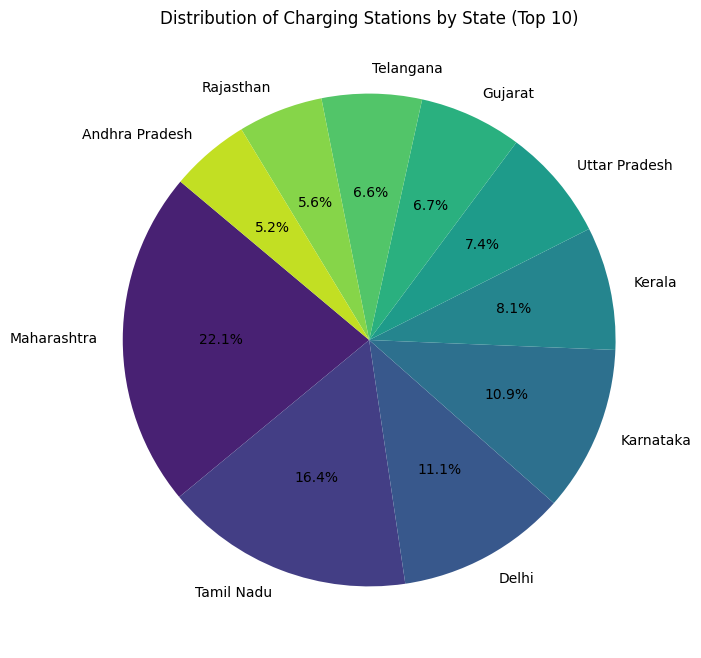

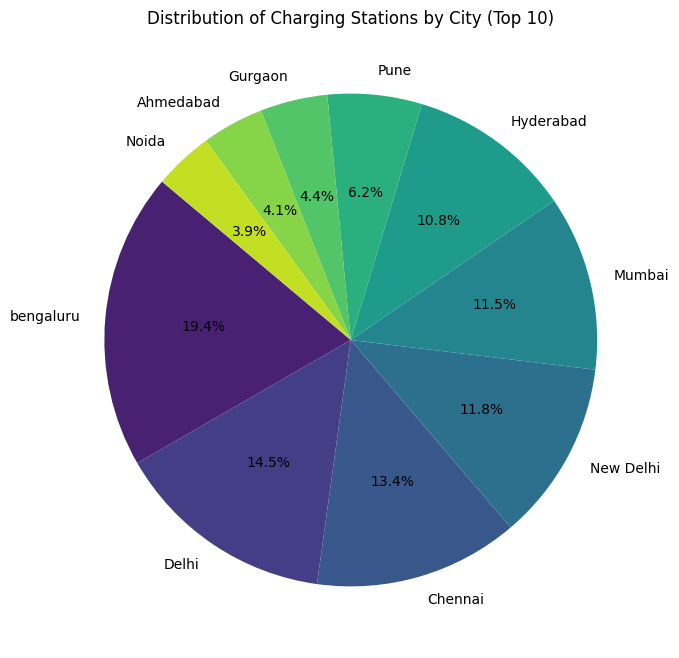

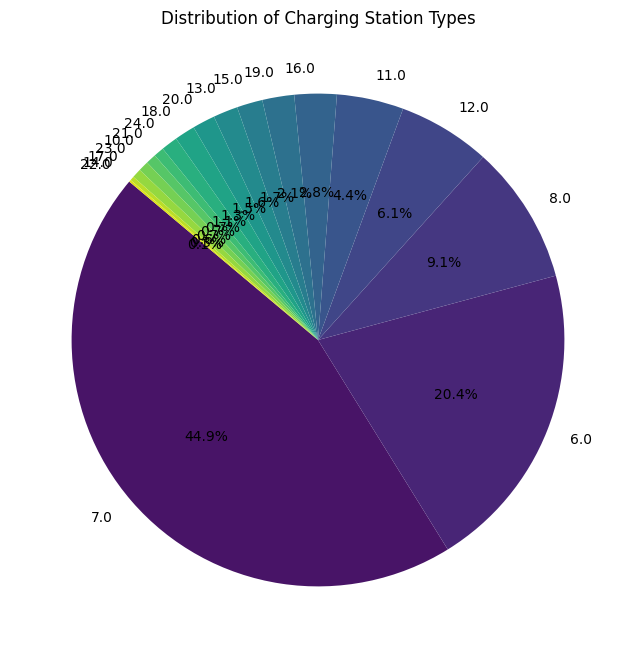

In [ ]:


# Generating pie charts for the categorical columns

# Pie chart for 'state'
plt.figure(figsize=(12, 8))
state_counts = df['state'].value_counts().head(10)  # Top 10 states
state_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Distribution of Charging Stations by State (Top 10)')
plt.ylabel('')
plt.show()

# Pie chart for 'city'
plt.figure(figsize=(12, 8))
city_counts = df['city'].value_counts().head(10)  # Top 10 cities
city_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Distribution of Charging Stations by City (Top 10)')
plt.ylabel('')
plt.show()

# Pie chart for 'type'
plt.figure(figsize=(12, 8))
type_counts = df['type'].value_counts()
type_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(type_counts)))
plt.title('Distribution of Charging Station Types')
plt.ylabel('')
plt.show()



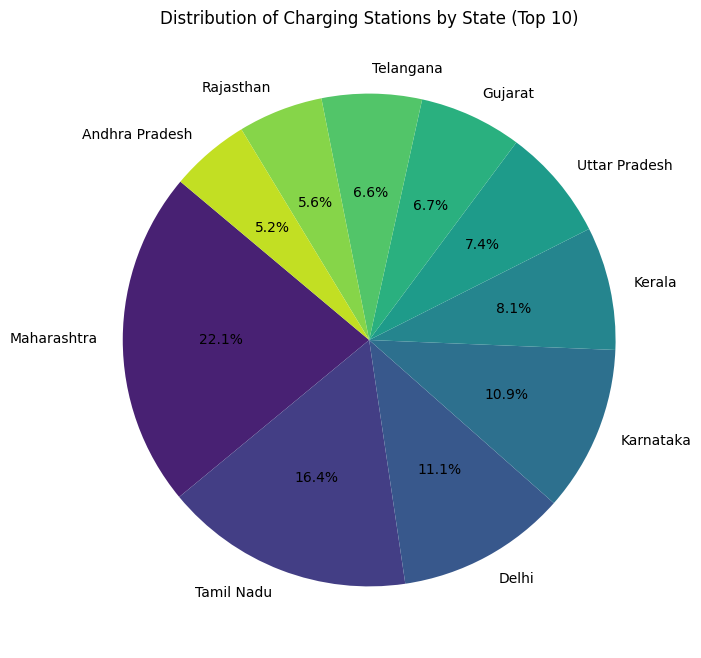

In [ ]:
# Pie chart for 'state'
plt.figure(figsize=(12, 8))
state_counts = df['state'].value_counts().head(10)  # Top 10 states
state_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Distribution of Charging Stations by State (Top 10)')
plt.ylabel('')
plt.show()

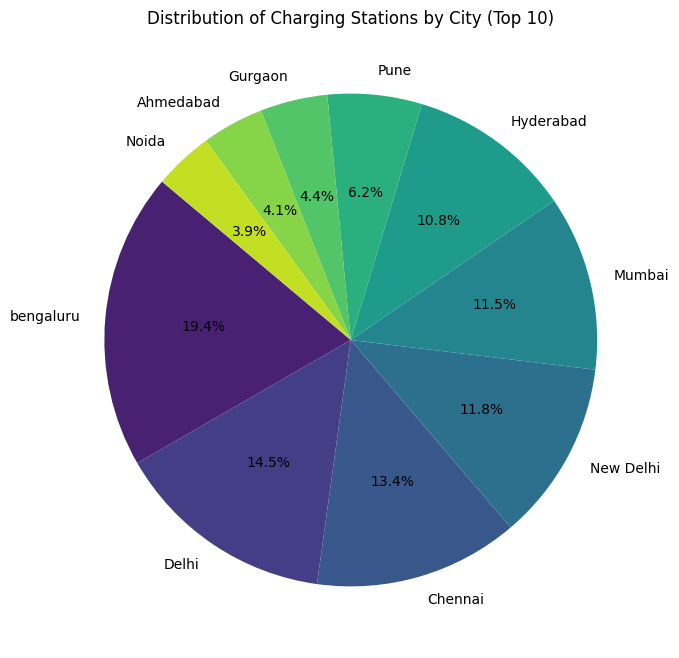

In [ ]:
# Pie chart for 'city'
plt.figure(figsize=(12, 8))
city_counts = df['city'].value_counts().head(10)  # Top 10 cities
city_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Distribution of Charging Stations by City (Top 10)')
plt.ylabel('')
plt.show()

### `PCA`

In [ ]:
x=df[['lattitude','longitude','type']]

In [ ]:
x

,lattitude,longitude,type
0,29.60,76.980300,12.0
1,28.46,77.081800,12.0
2,27.87,76.276000,12.0
3,29.31,77.721800,12.0
4,29.31,77.721800,12.0
...,...,...,...
1477,10.02,77.045859,7.0
1478,28.39,76.959200,7.0
1479,28.41,77.040546,7.0
1480,32.70,74.879203,7.0


In [ ]:
# determining the principle components
pca=PCA()
x_pca=pca.fit_transform(x)

x_pca_df = pd.DataFrame(data=x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])

print("\nImportance of Components:")
print(x_pca_df)


Importance of Components:
            PC1       PC2       PC3
0      9.164313  4.547995  1.108616
1      8.044085  4.319671  1.162085
2      7.425327  4.596099  0.428505
3      8.911854  4.160897  1.756953
4      8.911854  4.160897  1.756953
...         ...       ...       ...
1477  -9.371967 -2.970503 -1.765268
1478   8.749794 -0.003359 -1.253140
1479   8.773223 -0.037569 -1.180354
1480  12.907988  1.639676 -2.959699
1481  -6.650048 -1.502266 -3.626861

[1482 rows x 3 columns]


In [ ]:
rotations = pca.components_.T

rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=df.columns[:3])

rotations_df = rotations_df.round(1)

std_devs = np.sqrt(pca.explained_variance_).round(1)

print("Standard deviations (1, .., p=3):")
print(std_devs)
print("Rotation matrix (3 x 3):")
print(rotations_df)

Standard deviations (1, .., p=3):
[6.7 4.1 3.7]
Rotation matrix (3 x 3):
       PC1  PC2  PC3
name   1.0  0.2  0.0
state  0.0 -0.5  0.9
city  -0.2  0.9  0.5


## `Explained  Varience`

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  # Adjust the number of components if needed
principal_components = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

explained_variance, total_explained_variance


(array([0.40170372, 0.32032973, 0.27796654]), 1.0)

In [ ]:
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f} ({variance * 100:.2f}%)")

print(f"Total Variance Captured: {total_explained_variance:.4f} ({total_explained_variance * 100:.2f}%)")


Principal Component 1: 0.4017 (40.17%)
Principal Component 2: 0.3203 (32.03%)
Principal Component 3: 0.2780 (27.80%)
Total Variance Captured: 1.0000 (100.00%)


## `PCA score plot`

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for the score plot
principal_components = pca.fit_transform(scaled_data)


In [ ]:
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['State'] = df['state']  # Add state or any other categorical column for color coding


In [ ]:
pca_df[pca_df['Principal Component 1']>2]

,Principal Component 1,Principal Component 2,State
648,2.185517,0.613566,Kerala
668,2.417726,0.788118,Kerala
672,2.409976,0.915825,Kerala
747,2.305802,0.587707,Kerala
753,2.042314,-0.625962,Maharashtra
...,...,...,...
1418,2.914028,-0.452638,Maharashtra
1419,3.006975,-0.427970,Maharashtra
1420,3.020733,-0.542504,Maharashtra
1421,3.044177,-0.551436,Maharashtra


In [ ]:
pca_df.drop([368,535,1036],inplace=True)

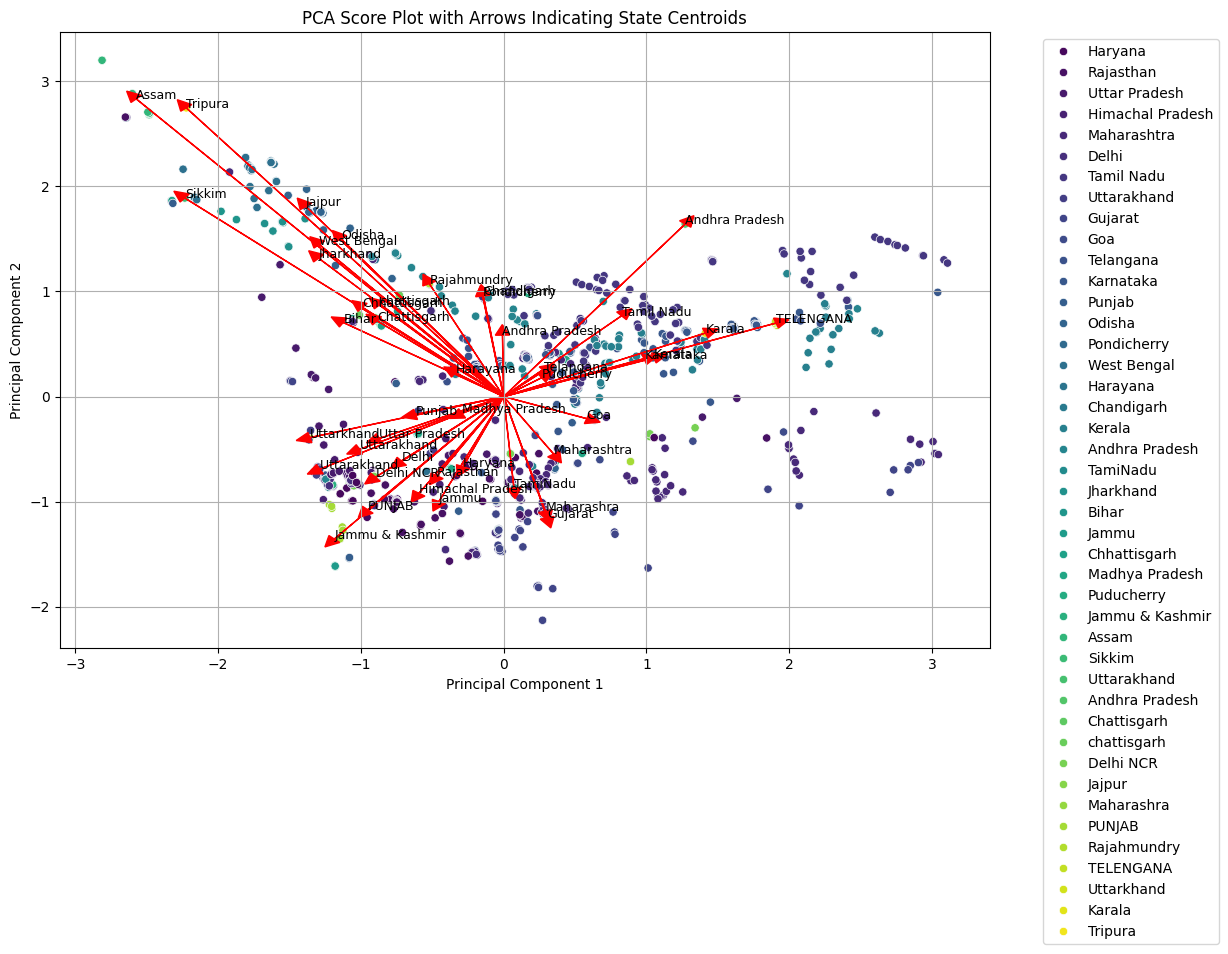

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Principal Component 1', y='Principal Component 2',
    hue='State', data=pca_df, palette='viridis', legend='full'
)

# Calculate centroids for each state
centroids = pca_df.groupby('State')[['Principal Component 1', 'Principal Component 2']].mean()

# Plot arrows from the origin to the centroids
for state, centroid in centroids.iterrows():
    plt.arrow(0, 0, centroid['Principal Component 1'], centroid['Principal Component 2'],
              head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=1)
    plt.text(centroid['Principal Component 1'], centroid['Principal Component 2'], state, fontsize=9)

plt.title('PCA Score Plot with Arrows Indicating State Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [ ]:
pca = PCA()    #creating the instance of class PCA
pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.40170372, 0.32032973, 0.27796654])

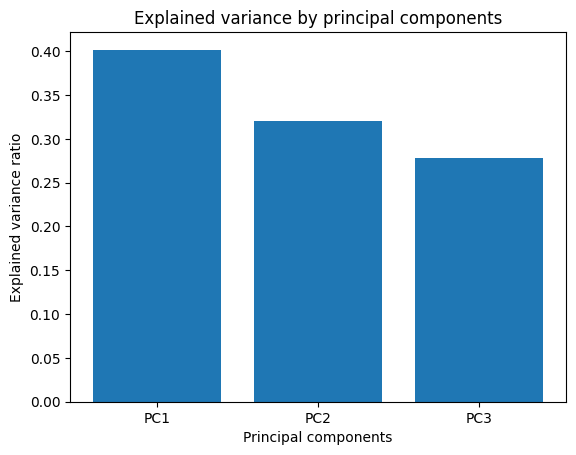

In [ ]:
components=['PC1', 'PC2', 'PC3']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

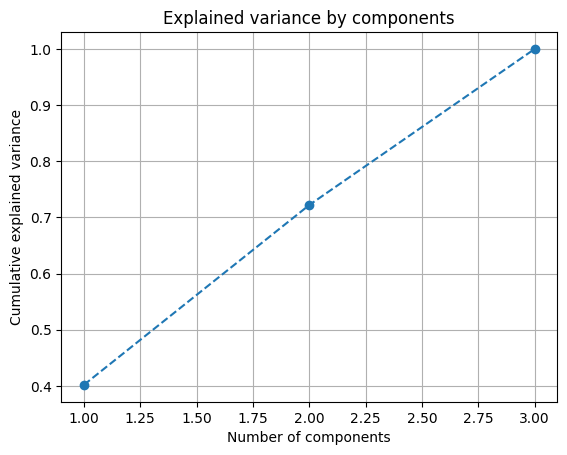

In [ ]:
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

### `K-Means Clustering`

In [ ]:
x=df[['lattitude',	'longitude']]

In [ ]:
#x.drop([1509],inplace=True)

<Axes: xlabel='lattitude', ylabel='longitude'>

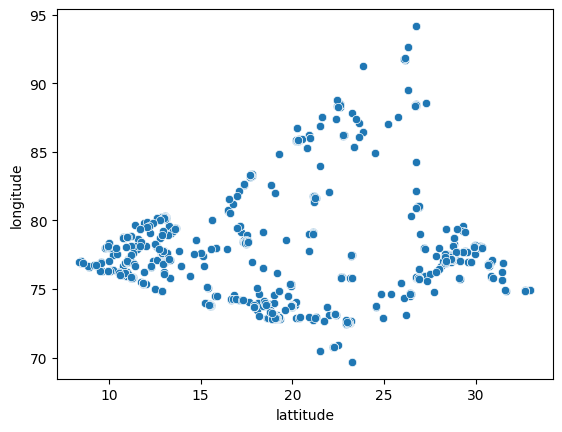

In [ ]:
sns.scatterplot(data=x, x='lattitude', y='longitude')

In [ ]:
pca=PCA()
x_pca=pca.fit_transform(x)

In [ ]:
x_pca

array([[ 9.76791862, -1.0765187 ],
       [ 8.63279594, -0.9302356 ],
       [ 8.0115428 , -1.71219351],
       ...,
       [ 8.58121123, -0.96949002],
       [12.78283417, -3.29798029],
       [-7.02321911, -2.55371554]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

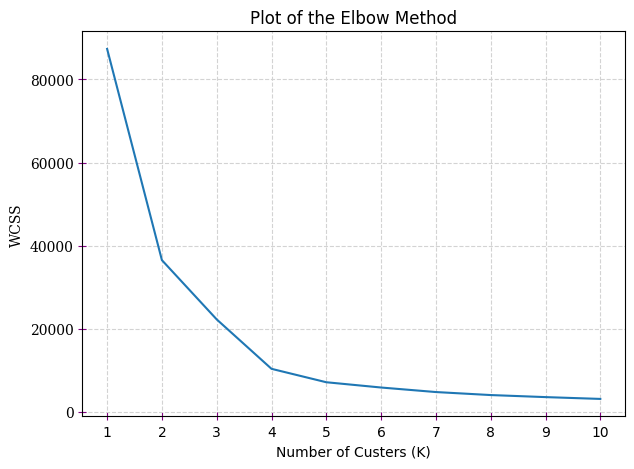

In [ ]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(x_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(7,5))
plt.title('Plot of the Elbow Method')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


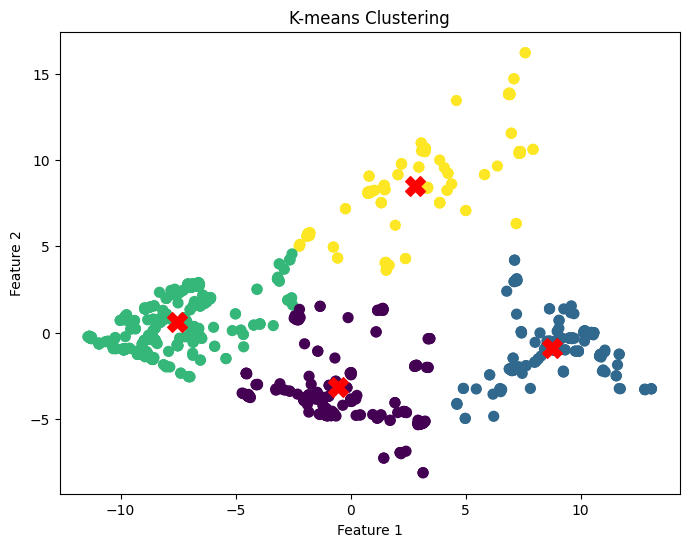

In [ ]:

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [ ]:
pd.Series(kmean.labels_).value_counts()

3    496
0    423
1    400
2    163
Name: count, dtype: int64

In [ ]:
df['clusters'] = kmean.labels_

<Axes: xlabel='lattitude', ylabel='longitude'>

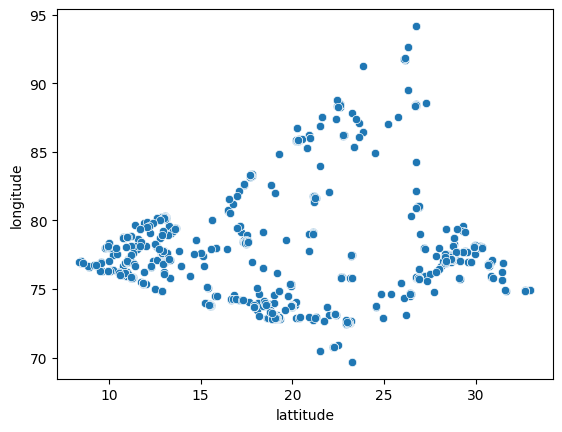

In [ ]:
sns.scatterplot(data=df, x=df['lattitude'], y=df['longitude'])

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,9.767919,-1.076519
1,8.632796,-0.930236
2,8.011543,-1.712194
3,9.507323,-0.324181
4,9.507323,-0.324181


In [ ]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

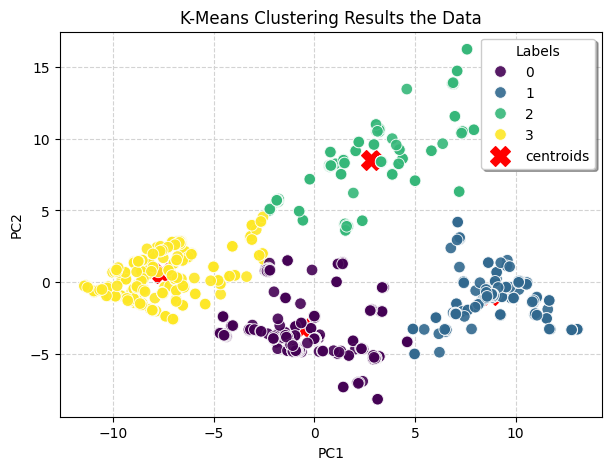

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X',label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results the Data')
plt.show()

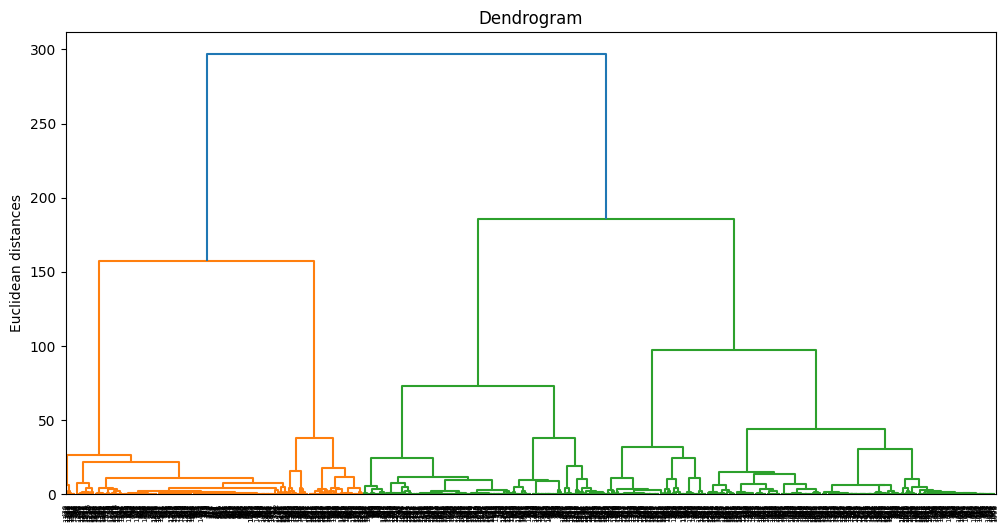

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:


df

,name,state,city,address,lattitude,longitude,type,clusters
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.60,76.980300,12.0,1
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.46,77.081800,12.0,1
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.87,76.276000,12.0,1
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.31,77.721800,12.0,1
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.31,77.721800,12.0,1
...,...,...,...,...,...,...,...,...
1477,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.02,77.045859,7.0,3
1478,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.39,76.959200,7.0,1
1479,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.41,77.040546,7.0,1
1480,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.70,74.879203,7.0,1


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,index,name,state,city,address,lattitude,longitude,type,clusters
0,0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.60,76.980300,12.0,1
1,1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.46,77.081800,12.0,1
2,2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.87,76.276000,12.0,1
3,3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.31,77.721800,12.0,1
4,4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.31,77.721800,12.0,1
...,...,...,...,...,...,...,...,...,...
1477,1477,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.02,77.045859,7.0,3
1478,1478,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.39,76.959200,7.0,1
1479,1479,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.41,77.040546,7.0,1
1480,1480,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.70,74.879203,7.0,1


In [ ]:
df.to_csv('new.csv', index_label=False)

In [ ]:






x=df[['lattitude',	'longitude']]

<Axes: xlabel='lattitude', ylabel='longitude'>

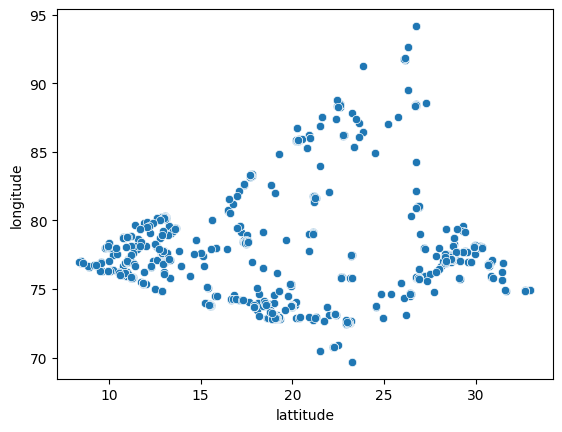

In [ ]:
sns.scatterplot(data=x, x='lattitude', y='longitude')

In [ ]:
pca=PCA()
x_pca=pca.fit_transform(x)

In [ ]:

kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [ ]:
pd.Series(kmean.labels_).value_counts()

3    496
0    423
1    400
2    163
Name: count, dtype: int64

In [ ]:
df['clusters'] = kmean.labels_

In [ ]:
df

,index,name,state,city,address,lattitude,longitude,type,clusters
0,0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.60,76.980300,12.0,1
1,1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.46,77.081800,12.0,1
2,2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.87,76.276000,12.0,1
3,3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.31,77.721800,12.0,1
4,4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.31,77.721800,12.0,1
...,...,...,...,...,...,...,...,...,...
1477,1477,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.02,77.045859,7.0,3
1478,1478,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.39,76.959200,7.0,1
1479,1479,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.41,77.040546,7.0,1
1480,1480,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.70,74.879203,7.0,1


In [ ]:
df["clusters"].value_counts()

clusters
3    496
0    423
1    400
2    163
Name: count, dtype: int64

In [ ]:
Cluster_0=df[df.clusters==0]
Cluster_1=df[df.clusters==1]
Cluster_2=df[df.clusters==2]
Cluster_3=df[df.clusters==3]

In [ ]:
[Cluster_0["state"].value_counts().head(),
Cluster_1["state"].value_counts().head(),
Cluster_2["state"].value_counts().head(),
Cluster_3["state"].value_counts().head()]
# target 27-30 years

[state
 Maharashtra       194
 Gujarat            67
 Telangana          52
 Madhya Pradesh     15
 Karnataka          12
 Name: count, dtype: int64,
 state
 Delhi            106
 Uttar Pradesh     69
 Delhi NCR         53
 Rajasthan         46
 Haryana           45
 Name: count, dtype: int64,
 state
 West Bengal     42
 Odisha          34
 Jharkhand       18
 Chhattisgarh    12
 Assam           10
 Name: count, dtype: int64,
 state
 Tamil Nadu        169
 Karnataka         105
 Kerala             77
 Andhra Pradesh     41
 Maharashtra        32
 Name: count, dtype: int64]

In [ ]:
[Cluster_0["city"].value_counts().head(),
Cluster_1["city"].value_counts().head(),
Cluster_2["city"].value_counts().head(),
Cluster_3["city"].value_counts().head()]

[city
 Mumbai       65
 Hyderabad    61
 Pune         35
 Ahmedabad    23
 pune         17
 Name: count, dtype: int64,
 city
 Delhi        82
 New Delhi    67
 Gurgaon      25
 Noida        22
 Jaipur       17
 Name: count, dtype: int64,
 city
 Kolkata          19
 Bhubaneswar      17
 Jamshedpur       10
 visakhapatnam     8
 Raipur            8
 Name: count, dtype: int64,
 city
 bengaluru           107
 Chennai              76
 kochi                11
 Thiruvanthapuram     10
 Kochi                 9
 Name: count, dtype: int64]

In [ ]:
print("CLUSTER 1:")
Cluster_0["state"].value_counts().head()

CLUSTER 1:


state
Maharashtra       194
Gujarat            67
Telangana          52
Madhya Pradesh     15
Karnataka          12
Name: count, dtype: int64

In [ ]:
print("CLUSTER 2:")
Cluster_1["state"].value_counts().head()

CLUSTER 2:


state
Delhi            106
Uttar Pradesh     69
Delhi NCR         53
Rajasthan         46
Haryana           45
Name: count, dtype: int64

In [ ]:
print("CLUSTER 3:")
Cluster_2["state"].value_counts().head()


CLUSTER 3:


state
West Bengal     42
Odisha          34
Jharkhand       18
Chhattisgarh    12
Assam           10
Name: count, dtype: int64

In [ ]:
print("CLUSTER 4:")
Cluster_3["state"].value_counts().head()


CLUSTER 4:


state
Tamil Nadu        169
Karnataka         105
Kerala             77
Andhra Pradesh     41
Maharashtra        32
Name: count, dtype: int64

In [ ]:
##CLUSTER OF CITIES

In [ ]:
print("CLUSTER 1:")
Cluster_0["city"].value_counts().head()

CLUSTER 1:


city
Mumbai       65
Hyderabad    61
Pune         35
Ahmedabad    23
pune         17
Name: count, dtype: int64

In [ ]:
print("CLUSTER 2:")
Cluster_1["city"].value_counts().head()


CLUSTER 2:


city
Delhi        82
New Delhi    67
Gurgaon      25
Noida        22
Jaipur       17
Name: count, dtype: int64

In [ ]:
print("CLUSTER 3:")
Cluster_2["city"].value_counts().head()


CLUSTER 3:


city
Kolkata          19
Bhubaneswar      17
Jamshedpur       10
visakhapatnam     8
Raipur            8
Name: count, dtype: int64

In [ ]:
print("CLUSTER 4:")
Cluster_3["city"].value_counts().head()


CLUSTER 4:


city
bengaluru           107
Chennai              76
kochi                11
Thiruvanthapuram     10
Kochi                 9
Name: count, dtype: int64